# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 10 ноября 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [734]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\pinma\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['mean', 'axes', 'size', 'sample', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

0) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения, то рисуйте его синим цветом.

In [735]:
colors =color_for_normal, color_for_laplace, color_for_cauchy = sns.color_palette("colorblind")[:3]

N = 500

norm_sample = sps.norm.rvs(size = N)
laplace_sample = sps.laplace.rvs(size=N)
cauchy_sample = sps.cauchy.rvs(size=N)

1) Постройте график плотности распределения для всех трех распределений на одних осях.

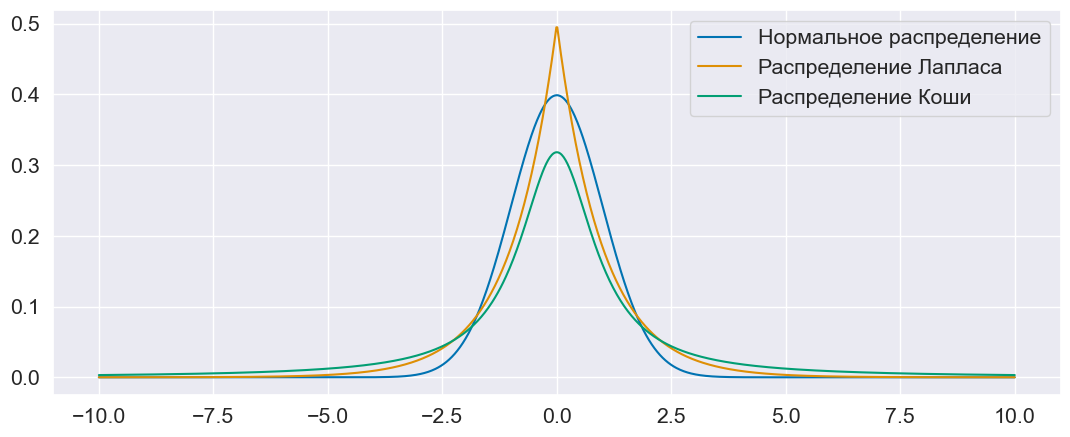

In [736]:
x = np.linspace(-10, 10, 1000)
plt.figure(figsize=(13,5))
plt.plot(x, sps.norm.pdf(x), color = color_for_normal, label = "Нормальное распределение")
plt.plot(x, sps.laplace.pdf(x), color = color_for_laplace, label = "Распределение Лапласа")
plt.plot(x, sps.cauchy.pdf(x), color = color_for_cauchy, label="Распределение Коши")
plt.legend()
plt.show()

2) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:**

Для распределения Коши оценка медианой будет лучше, так как у него нет матожидания, а значит оценка среднем не будет даже ассимптотически нормальной. <br>
Для нормального распределения из ЦПТ для оценки среднем имеем: <br>
$\sqrt{n}(\overline{X} - a) \xrightarrow[]{d} N(0, 1)$, где a-параметр сдвига <br>
Для оценки медианой можно использовать метод квантилей, так как все наши распределения симметричны относительно нуля, а значит медиана распределений будет просто равна параметру сдвиг. В таком случае для медианы метод квантилей выглядит следующем образом: <br>
$\sqrt{n}(X_{n,\frac{1}{2}} - a)\xrightarrow[]{d} N(0, \frac{1}{4f^2(X_\frac{1}{2})})$, где f-плотность распределения <br>
Тогда для оценки медианой нормального распределения получаем: <br>
$\sqrt{n}(X_{n,\frac{1}{2}} - a)\xrightarrow[]{d} N(0, \frac{\pi}{2})$ <br>
Тогда получаем, что оценка среднем асимптотически точнее оценки медианой, так как $\frac{\pi}{2} > 1$, то есть асимптотическая дисперсия у оценки медианой больше, чем у оценки средним. <br>
Аналогично распишем для распределения Лапласа. Его плотность распределения $f = \frac{1}{2}e^{-|x|}$. Нетрудно посчитать, что дисперсия тогда будет равна 2. Тогда для оценки среднем из цпт получаем: <br>
$\sqrt{n}(\overline{X} - a) \xrightarrow[]{d} N(0, 2)$ <br>
Методом квантилей же получаем, так как $f^2(0) = \frac{1}{4}e^0 = \frac{1}{4}$: <br>
$\sqrt{n}(X_{n,\frac{1}{2}} - a) \xrightarrow[]{d} N(0, 1)$ <br>
То есть у медианы асимптотическая дисперсия получается меньше, чем у оценки средним. <br>
Таким образом мы получили, что у медианы ожидается оценка точнее, чем у среднего в случае Лапласа и наоборот в случае нормального распределения.


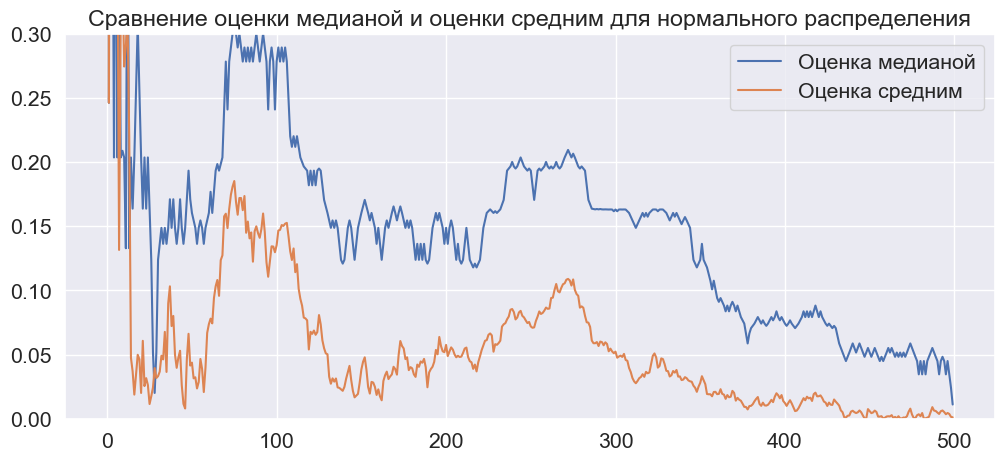

In [737]:
# Эксперименты с оценкой средним и медианы
def count_cummedian(sample):
    cummedian = np.zeros(sample.size)
    for i in np.arange(0, sample.size):
        cummedian[i] = np.median(sample[:(i+1)])
    return cummedian
norm_median_eval = count_cummedian(norm_sample)
norm_mean_eval = np.cumsum(norm_sample)/np.arange(1, N+1)
plt.figure(figsize=(12,5))
plt.plot(np.abs(norm_median_eval), label = "Оценка медианой")
plt.plot(np.abs(norm_mean_eval), label="Оценка средним")
plt.ylim(0, 0.3)
plt.title("Сравнение оценки медианой и оценки средним для нормального распределения")
plt.legend()
plt.show()

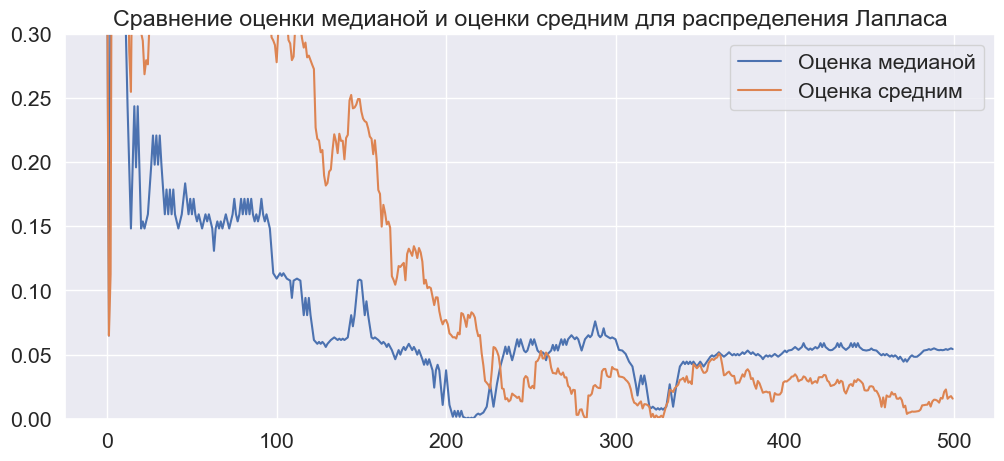

In [738]:
laplace_median_eval = count_cummedian(laplace_sample)
laplace_mean_eval = np.cumsum(laplace_sample)/np.arange(1, N+1)
plt.figure(figsize=(12,5))
plt.plot(np.abs(laplace_median_eval), label = "Оценка медианой")
plt.plot(np.abs(laplace_mean_eval), label="Оценка средним")

plt.title("Сравнение оценки медианой и оценки средним для распределения Лапласа")
plt.legend()
plt.ylim(0,0.3)
plt.show()

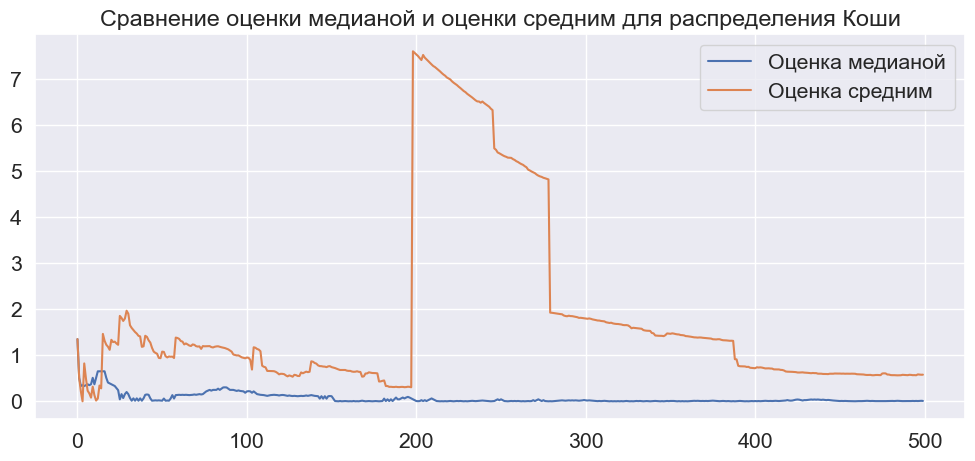

In [739]:
cauchy_median_eval = count_cummedian(cauchy_sample)
cauchy_mean_eval = np.cumsum(cauchy_sample)/np.arange(1, N+1)
plt.figure(figsize=(12,5))
plt.plot(np.abs(cauchy_median_eval), label = "Оценка медианой")
plt.plot(np.abs(cauchy_mean_eval), label="Оценка средним")
plt.title("Сравнение оценки медианой и оценки средним для распределения Коши")
plt.legend()
plt.show()

3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

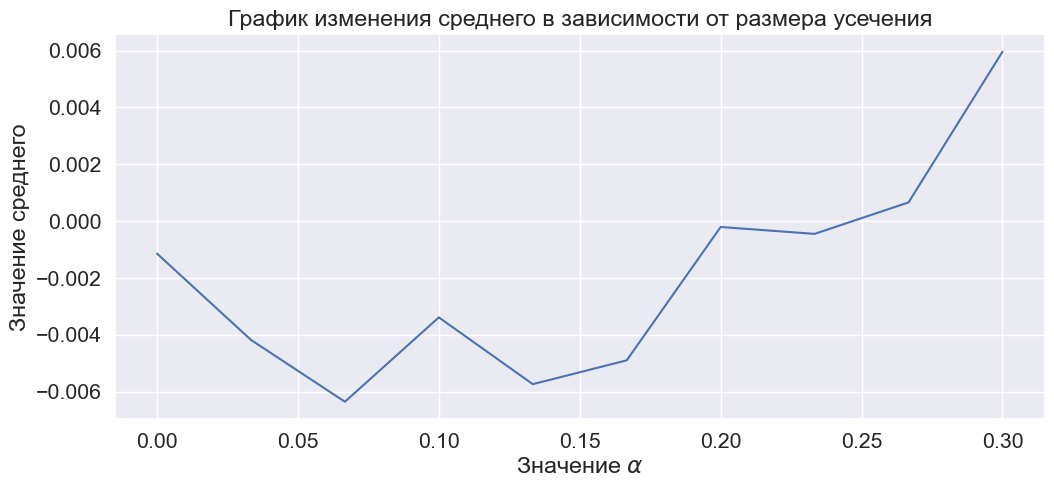

In [740]:
def truncated_mean(sample, alpha=0.3):
    truncated_mean = np.mean(np.sort(sample)[int(sample.size * alpha) : int((1-alpha)*sample.size)])
    return truncated_mean
plt.figure(figsize=(12,5))
alphas = np.linspace(0, 0.3, 10)
samples_mean = [truncated_mean(norm_sample, alpha) for alpha in alphas]
plt.plot(alphas, samples_mean)
plt.title("График изменения среднего в зависимости от размера усечения")
plt.xlabel(r"Значение $\alpha$")
plt.ylabel(r"Значение среднего")
plt.show()

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

c:\Users\pinma\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\pinma\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


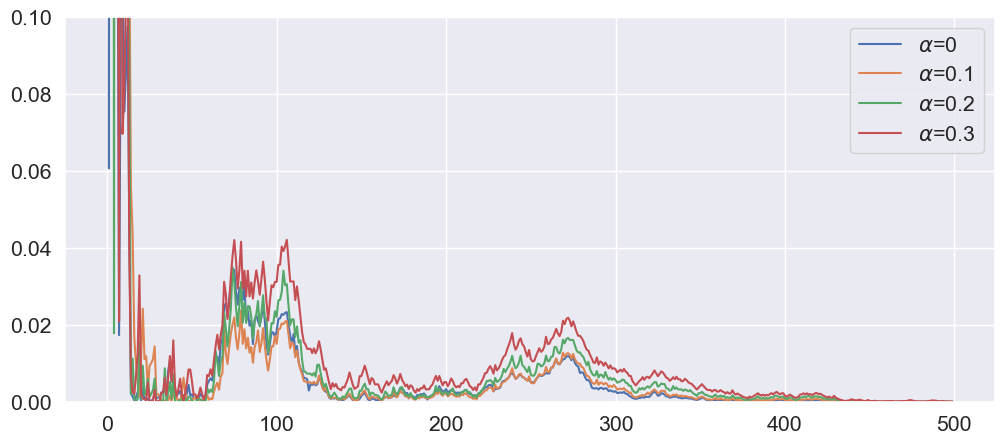

In [741]:
alphas = [0, 0.1, 0.2, 0.3]
truncated_means = {}
norm_sample_prefs = [norm_sample[:(i+1)] for i in np.arange(0, norm_sample.size)]
for alpha in alphas:
    pref_truncated_means = []
    for pref in norm_sample_prefs:
        pref_truncated_means.append(truncated_mean(pref, alpha)**2)
    truncated_means[alpha] = pref_truncated_means
plt.figure(figsize=(12,5))
for alpha in alphas:
    plt.plot(truncated_means[alpha], label = r'$\alpha$={}'.format(alpha))
plt.ylim(0,0.1)
plt.legend()
plt.show()

Точнее получились оценки у которых $\alpha$ меньше. 

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [742]:
from scipy.integrate import quad

def asymptotic_var(distribution, alpha):
  quantile = distribution.ppf(1-alpha)
  return 2 * (quad(func = lambda x: x**2 * distribution.pdf(x), a = 0, b = quantile)[0] + alpha*(quantile**2)) / (1 - 2 * alpha)**2

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

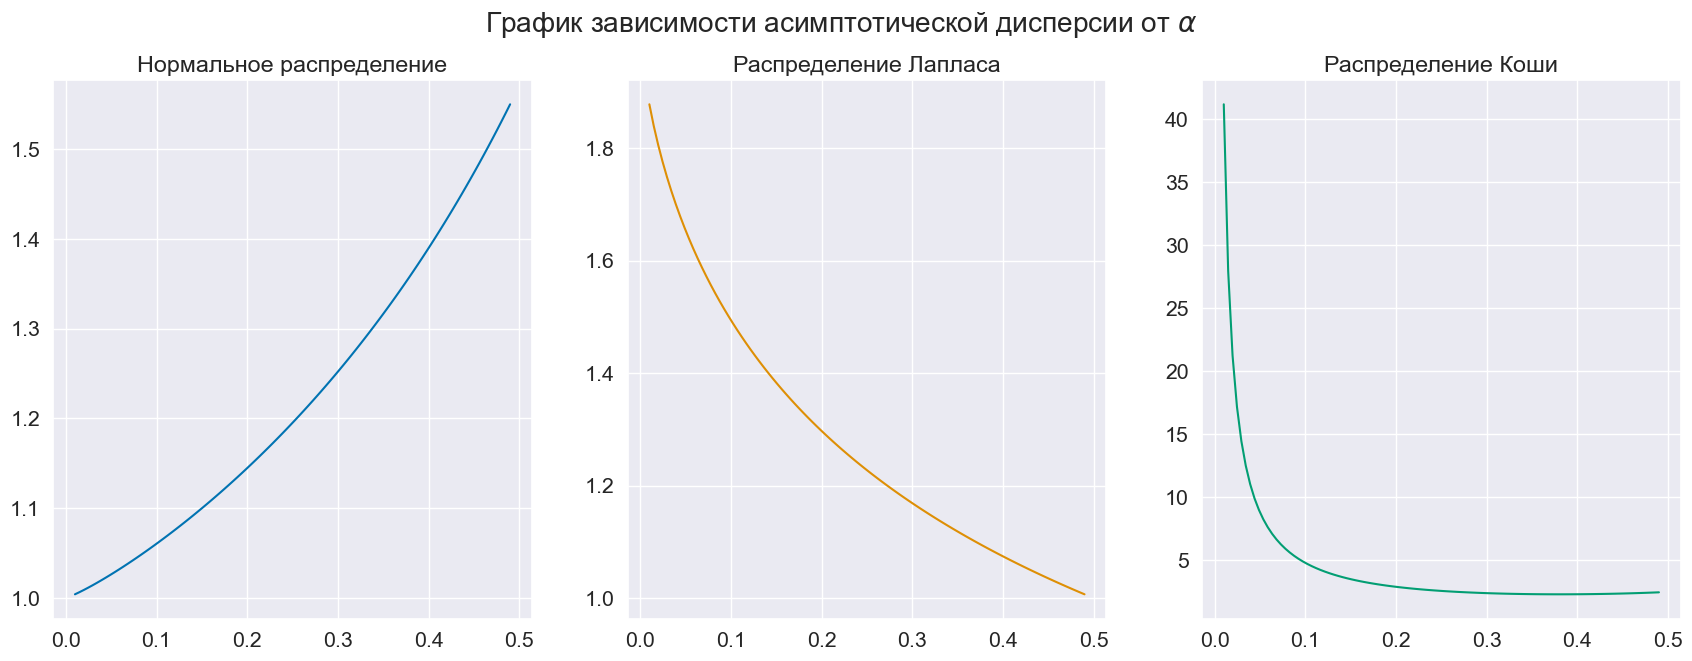

In [744]:
alphas = np.linspace(0.01, 0.49, 100)
norm_var = []
laplace_var = []
cauchy_var = []
for alpha in alphas:
  norm_var.append(asymptotic_var(sps.norm, alpha))
  laplace_var.append(asymptotic_var(sps.laplace, alpha))
  cauchy_var.append(asymptotic_var(sps.cauchy, alpha))
var_array = [norm_var, laplace_var, cauchy_var]
fig, ax = plt.subplots(1, 3, figsize=(21,7))
titles = ['Нормальное распределение', 'Распределение Лапласа', 'Распределение Коши']
for i in np.arange(0, 3):
  ax[i].plot(alphas, var_array[i], color=colors[i])
  ax[i].set_title(titles[i])
  ax[i].set_xlabel(r'')
  ax[i].set_ylabel(r'')

fig.suptitle(r'График зависимости асимптотической дисперсии от $\alpha$')
plt.show()

6) Breakdown point в статистике неформально называется такое наибольшее число $x$ от 0 до 1, что если изменить больше $(100\cdot x)\%$ наблюдений выборки на выбросы, то оценка "пойдёт в разнос" и её значение может оказаться сколь угодно большим по модулю, как если бы вся выборка состояла из выбросов.

Предположите, как Breakdown point зависит от параметра $\alpha$.

Ответ:Breakdown point будет равен $\alpha$, поскольку, если заменить больше, чем $\alpha$ чисел на достаточно большие выбросы с положительным знаком, то мы при усечении, можем не удалить все выбросы, так как мы удаляем справа $\alpha$ долю чисел, а выбросов больше, то есть оценка может стать неустойчивой.

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных $(100\cdot x)\%$ выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

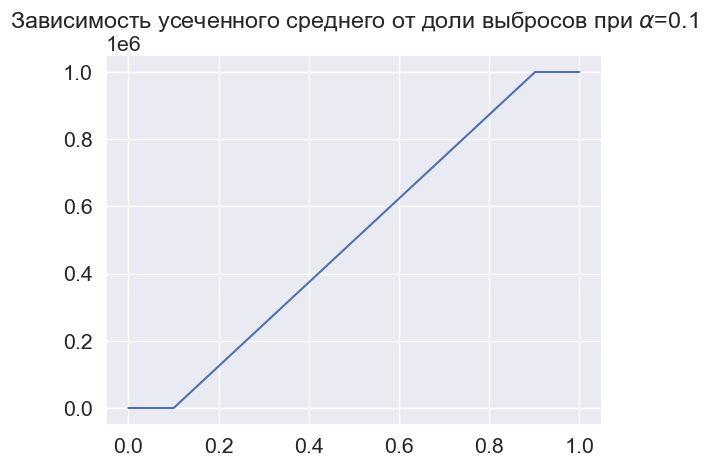

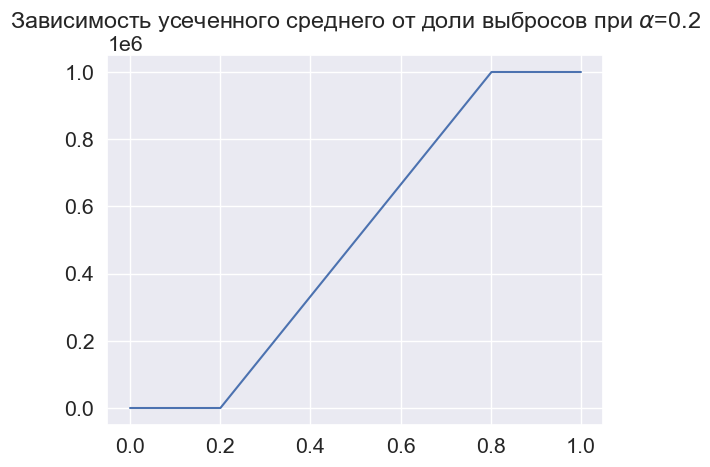

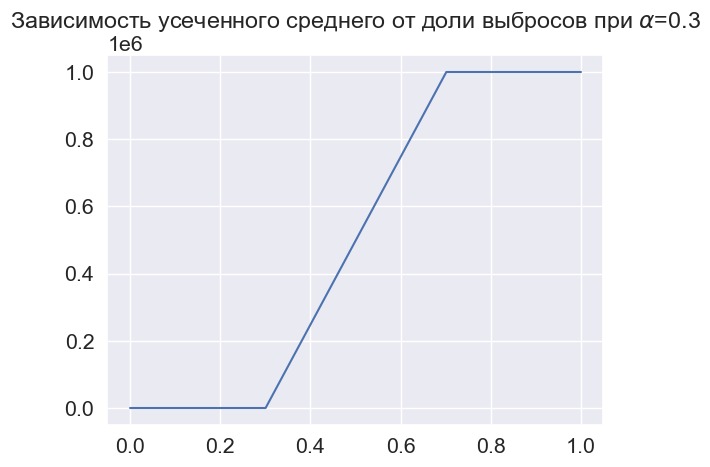

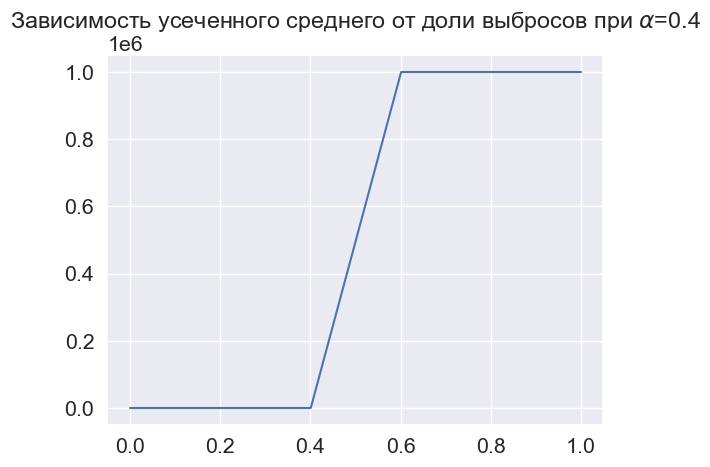

In [ ]:
alphas = [0.1, 0.2, 0.3, 0.4]
breakpoint_alphas = np.linspace(0,1, 500)
for alpha in alphas:
    truncated_means = []
    for breakpoint_alpha in breakpoint_alphas:
        outlier_indices = np.random.choice(norm_sample.size, int(norm_sample.size*breakpoint_alpha), replace=False)
        outliers_sample = norm_sample.copy()
        outliers_sample[outlier_indices] = 10**6
        truncated_means.append(truncated_mean(outliers_sample, alpha))
    plt.plot(breakpoint_alphas, truncated_means)
    plt.title(r"Зависимость усеченного среднего от доли выбросов при $\alpha$={}".format(alpha))
    plt.xlabel("")
    plt.show()


По графикам видно, что как раз начиная с $\alpha$ усеченное среднее "идет в разнос", что и подтверждает наше предположение.

7) Для каждого распределения на отдельном графике по всем префиксам постройте значение трех оценок: среднего, медианы и усечённого среднего порядка $0.35$. Для усечённого среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [ ]:
alpha = 0.35
norm_truncated_eval = [truncated_mean(norm_sample[:(i+1)], alpha) for i in np.arange(0, N)]
laplace_truncated_eval = [truncated_mean(laplace_sample[:(i+1)], alpha) for i in np.arange(0, N)]
cauchy_truncated_eval = [truncated_mean(cauchy_sample[:(i+1)], alpha) for i in np.arange(0, N)]

**Нормальное распределение**

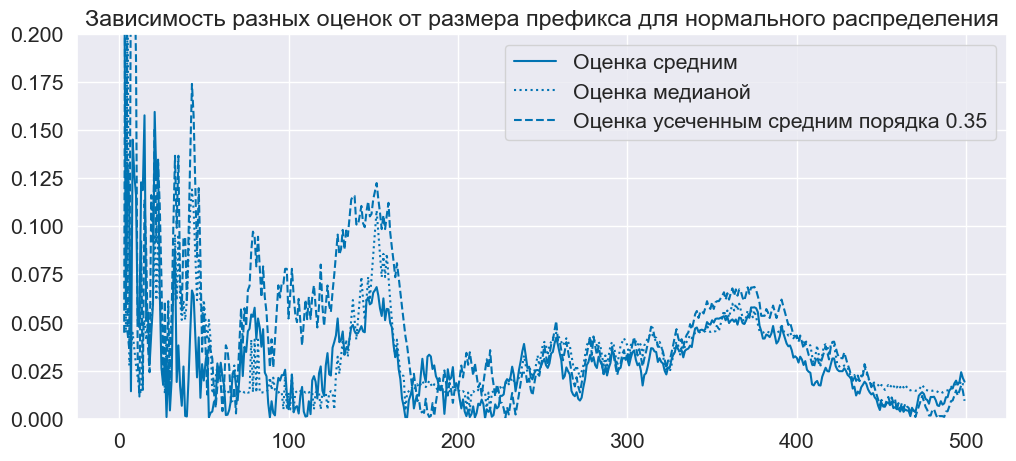

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.abs(norm_mean_eval), color = color_for_normal, label="Оценка средним")
plt.plot(np.abs(norm_median_eval), color = color_for_normal, linestyle=":", label="Оценка медианой")
plt.plot(np.abs(norm_truncated_eval), color = color_for_normal, linestyle="--", label="Оценка усеченным средним порядка 0.35")
plt.ylim(0, 0.2)
plt.legend()
plt.title("Зависимость разных оценок от размера префикса для нормального распределения")
plt.show()

**Распределение Лапласа**

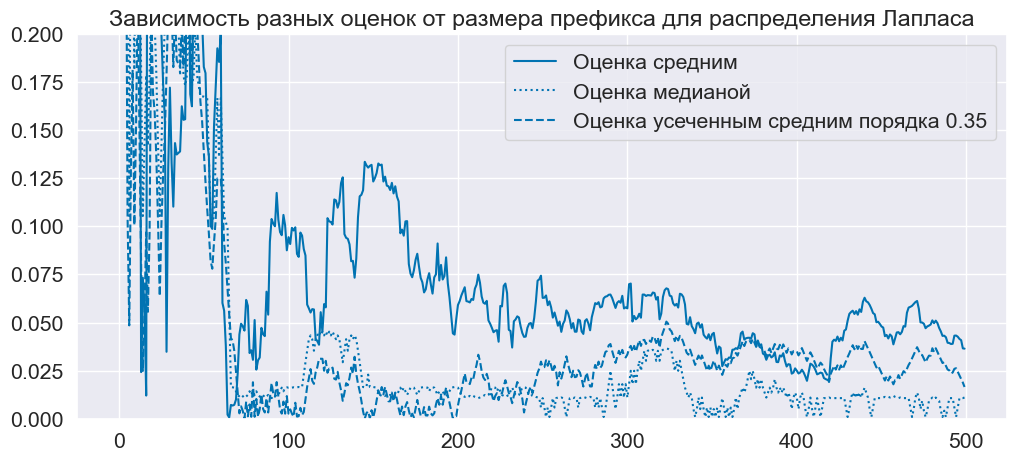

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.abs(laplace_mean_eval), color = color_for_normal, label="Оценка средним")
plt.plot(np.abs(laplace_median_eval), color = color_for_normal, linestyle=":", label="Оценка медианой")
plt.plot(np.abs(laplace_truncated_eval), color = color_for_normal, linestyle="--", label="Оценка усеченным средним порядка 0.35")
plt.ylim(0, 0.2)
plt.legend()
plt.title("Зависимость разных оценок от размера префикса для распределения Лапласа")
plt.show()

**Распределение Коши**

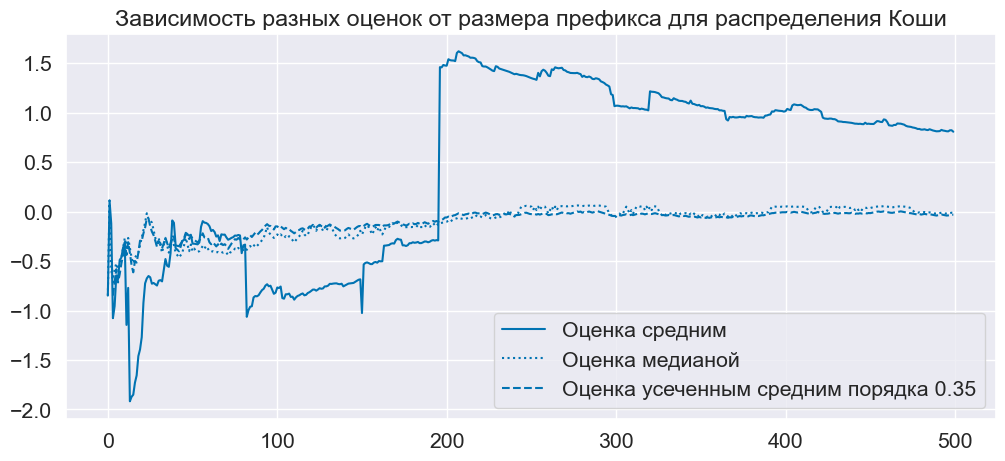

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(cauchy_mean_eval, color = color_for_normal, label="Оценка средним")
plt.plot(cauchy_median_eval, color = color_for_normal, linestyle=":", label="Оценка медианой")
plt.plot(cauchy_truncated_eval, color = color_for_normal, linestyle="--", label="Оценка усеченным средним порядка 0.35")
# plt.ylim(-0.2, 0.2)
plt.legend()
plt.title("Зависимость разных оценок от размера префикса для распределения Коши")
plt.show()

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

На графиках дисперсий оценок видно, что для распределений Лапласа и Коши с ростом параметра $\alpha$ оценка асимптотически становится точнее, и достигает минимума при медиане, а это как раз то, что мы и получили выше посчитав теоретически для этих распределений асимптотические дисперсии оценок средним и медианой. ТДля нормального же все наоборот, с ростом $\alpha$ оценка становится все менее точнее, так как асимптотическая дисперсия возрастает. На графиках, полученных выше, видно, что для нормального оценка усеченным среднем, медианой и средним примерно одинаковые(усеченным средним чуть-чуть лучше, чем медианой, а медианой чуть-чуть лучше чем средним), это возможно связано с достаточно малым размером выборки. Для Лапласа лучше оценка медианой. Для распределения Коши же оценка усеченным средним показала себя достаточно хорошо, она почти такая же точная, как оценка медианой. Для распределения Лапласа все оценки также как и с нормальным ведут себя примерно одинаково.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального Правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее? Указание: "усекать" можно не только по квантилю, но и по числу

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

3.5) Выразите усечённое среднее как L-оценку

Ответ:

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: c:\Users\pinma\Downloads\Telegram Desktop\winequality-red.csv

  0%|          | 0.00/101k [00:00<?, ?B/s]
100%|██████████| 101k/101k [00:00<00:00, 4.04MB/s]


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("winequality-red.csv")

In [ ]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [ ]:
data['category'] = data['alcohol'].apply(lambda x : 'low alcohol' if x <= 10 else 'medium alcohol' if 0 < x <= 12 else 'high alcohol')

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [ ]:
df = pd.DataFrame(data.groupby('category')['residual sugar'].agg(["mean", "median"])).reset_index()

In [ ]:
df.set_index(df['category'], inplace = True)
df = df.drop(columns=["category"])
df

,mean,median
category,,
high alcohol,2.760993,2.3
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Чем больше алкоголя в вине, тем больше сахара. Также видно, что медиана везде меньше, чем среднее. Это может свидетельствовать о выбросах в датасете.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

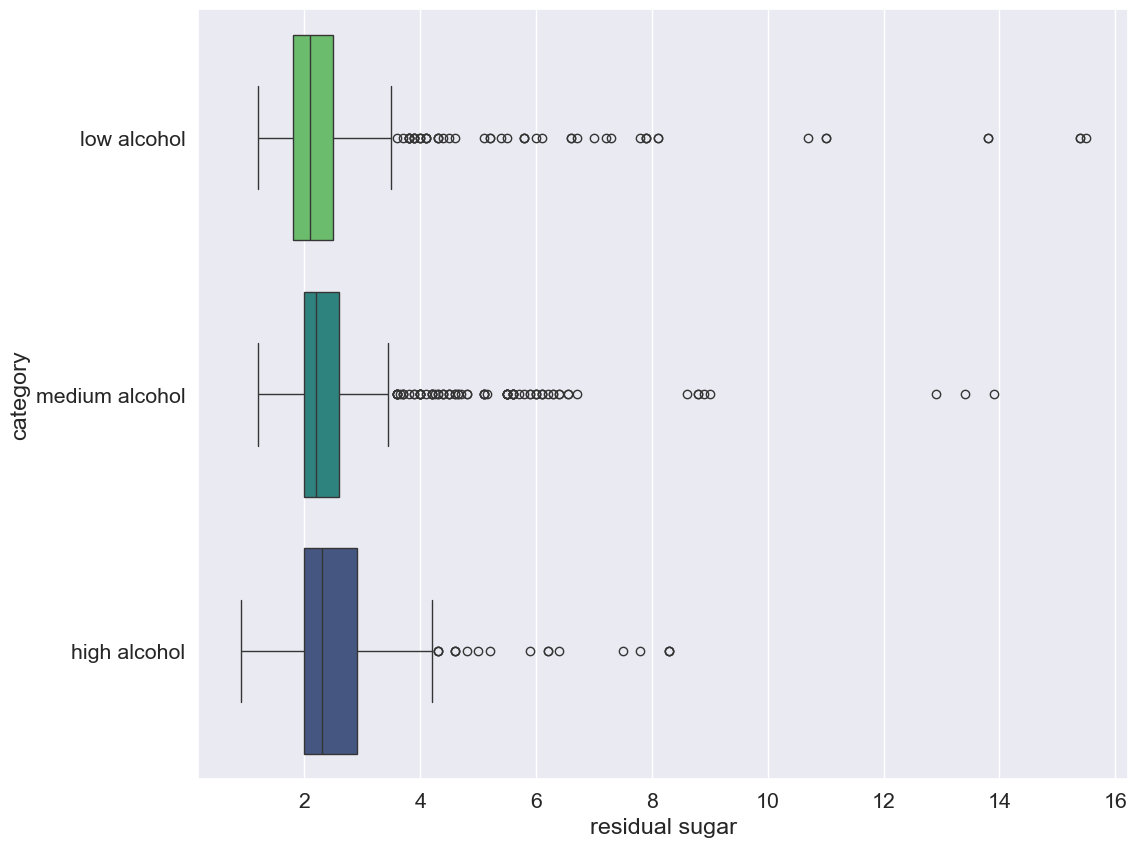

In [ ]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
# YOUR CODE GOES HERE
plt.figure(figsize = (12, 10))
sns.boxplot(x=data['residual sugar'], y = data['category'], palette = palette, hue=data['category'], legend=False)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** На графике видно, что выбросов достаточно много. В таком случае лучше использовать медиану, так как среднее будет сильно отклоняться в сторону выбросов.

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Ответ: Во всех выборках видно, что очень много выбросов, поэтому лучше использовать медиану по выше описанным причинам. 

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

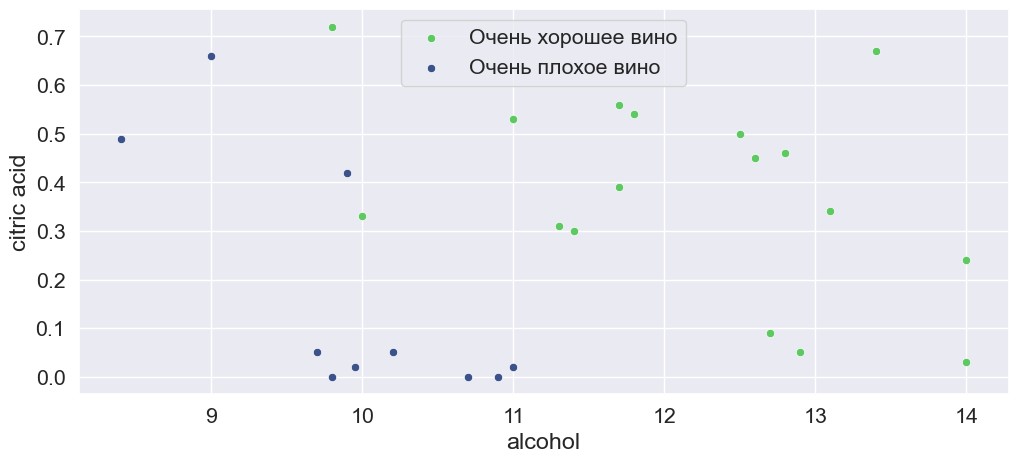

In [ ]:
#YOUR CODE GOES HERE
plt.figure(figsize=(12,5))
sns.scatterplot(data = data[data['quality'] == 8], x = 'alcohol', y = 'citric acid', label="Очень хорошее вино",  color=palette[0])
sns.scatterplot(data = data[data['quality'] == 3], x = 'alcohol', y = 'citric acid', label="Очень плохое вино", color=palette[-1])
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

Оценка правдоподобия для нормального распределения, для параметра $\mu$ - это просто среднее, а для параметра $\Sigma$ - это матрица ковариации.

In [ ]:
good_wine = data[data['quality'] == 8][['alcohol', 'citric acid']]
bad_wine = data[data['quality'] == 3][['alcohol', 'citric acid']]
good_wine_mean = np.mean(good_wine, axis = 0)
bad_wine_mean = np.mean(bad_wine, axis = 0)
good_wine_cov = np.cov(good_wine.T, bias=True)
bad_wine_cov = np.cov(bad_wine.T, bias=True)
print(r"Оцнека mu для хорошего вина:{}".format(good_wine_mean))
print(r"Оцнека mu для плохого вина:{}".format(bad_wine_mean))

Оцнека mu для хорошего вина:alcohol        12.094444
citric acid     0.391111
dtype: float64
Оцнека mu для плохого вина:alcohol        9.955
citric acid    0.171
dtype: float64


Посчитаем плотность на сетке:

In [ ]:
x_values = np.linspace(8, 15, 100) 
y_values = np.linspace(-0.4, 0.8, 100)
grid = [[] for i in np.arange(100)]
for y, i in zip(y_values, np.arange(100)):
    for x in x_values:
        grid[i].append([x,y])
good_wine_pdf = sps.multivariate_normal(mean=good_wine_mean, cov=good_wine_cov).pdf(grid)
bad_wine_pdf = sps.multivariate_normal(mean=bad_wine_mean, cov=bad_wine_cov).pdf(grid)

Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

In [ ]:
#YOUR CODE GOES HERE

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

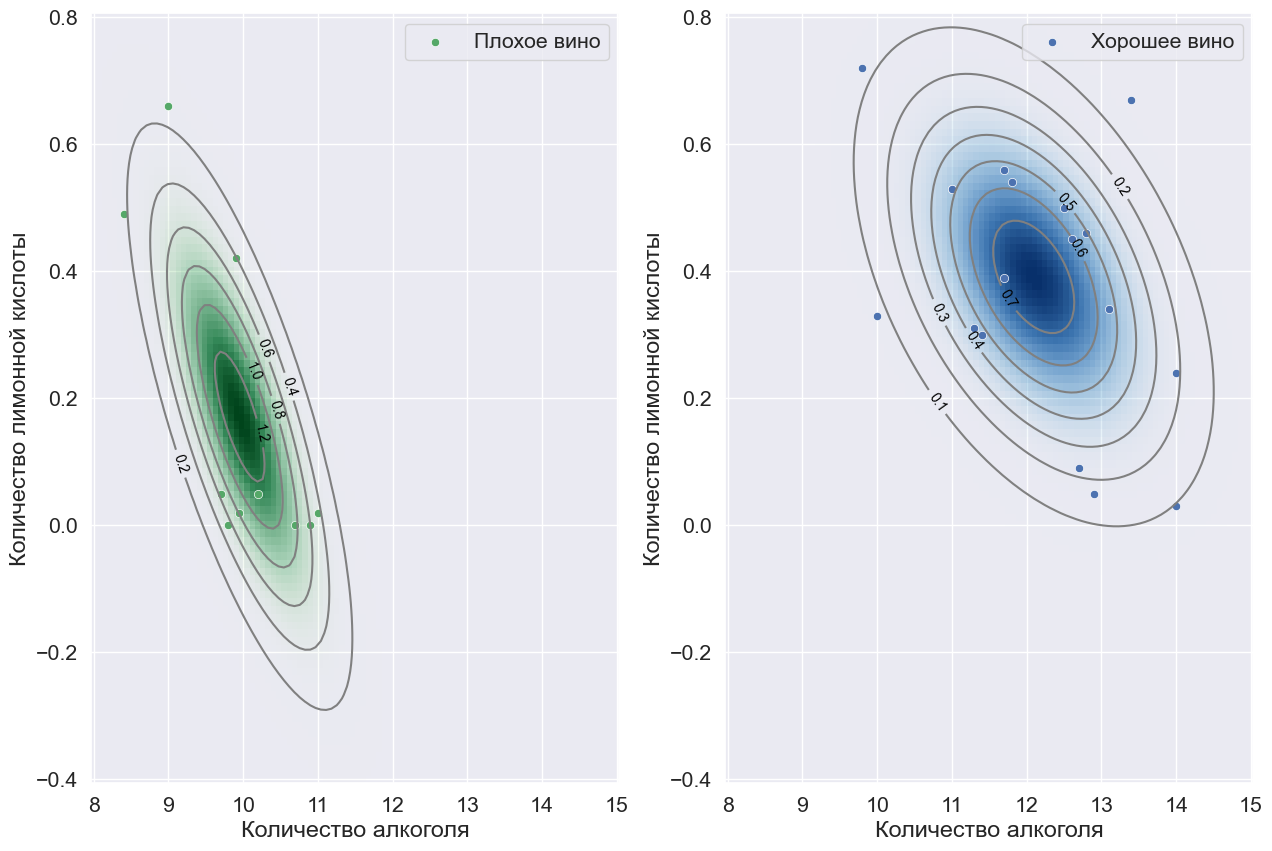

In [ ]:
samples = [bad_wine, good_wine]
pdfs = [bad_wine_pdf, good_wine_pdf]
means = [bad_wine_mean, good_wine_mean]
titles = ['Плохое вино', 'Хорошее вино']
colors_ = ['g', 'b']
cmaps = [get_density_cmap("Greens"), get_density_cmap("Blues")]
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for i in np.arange(2):
    axes[i].set_xlabel("Количество алкоголя")
    axes[i].set_ylabel("Количество лимонной кислоты")
    axes[i].pcolormesh(x_values, y_values, pdfs[i], cmap=cmaps[i], shading='auto')
    cs = axes[i].contour(x_values, y_values, pdfs[i], colors="grey")
    axes[i].clabel(cs, cs.levels, fontsize=10, colors='black')
    sns.scatterplot(ax=axes[i], data=samples[i], x='alcohol', y='citric acid', color=colors_[i], label=f"{titles[i]}")
plt.show()


Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** Видно, что в хорошем вине содержится намного больше алкоголя и лимонной кислоты. Также плохое вино имеет намного больший разброс по количеству лимонной кислоты, чем у хорошего вина.

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, который с высокой вероятностью накрывает истинное значение параметра.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [ ]:
def draw_confidence_interval(sample, low, high, est, theta):
  N = sample.size
  plt.figure(figsize=(12, 6))
  plt.plot(est, color = 'blue', label='Оценка')
  plt.axhline(theta, color = 'red', label='Истинное значение параметра')
  plt.fill_between(np.arange(1, N + 1), low, high, color = 'blue', alpha = 0.2, label=f'Доверительеый интервал с уровнем доверия 0.95')
  plt.xlabel('Размер выборки')
  plt.ylabel('Значение параметра')
  plt.title('Доверительный интервал')
  plt.legend()
  plt.ylim(0,20)
  plt.grid(True)
  plt.show()

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Запишем неравенство Чебышева для равномерного распределения и из него получим доверительный интервал. В одной из предыдущих домашек мы уже считали, что $EX_{(n)}=\frac{n\theta}{n+1}$ и $DX_{(n)} = \frac{n\theta^2}{(n+1)^2(n+2)}$. Тогда по неравенству Чебышева получаем: <br>
$P(|X_{(n)}-\frac{n\theta}{n+1}| \geq \varepsilon) < \frac{n\theta^2}{(n+1)^2(n+2)\varepsilon^2}$ <br>
$P(-\varepsilon + \frac{n\theta}{n+1} < X_{n}<\varepsilon + \frac{n\theta}{n+1}) \geq 1 - \frac{n\theta^2}{(n+1)^2(n+2)\varepsilon^2}$<br>
Тогда обозначив правую часть за $\alpha$ и выразив $\varepsilon$ через $\alpha$ получим: <br>
$P(\frac{X_{(n)}(n+1)}{n+\sqrt{\frac{n}{(n+1)(1-\alpha)}}} < \theta < \frac{X_{(n)}(n+1)}{n-\sqrt{\frac{n}{(n+1)(1-\alpha)}}}) \geq \alpha$ <br>
Таким образом получили доверительный интервал. Теперь изобразим его на графике

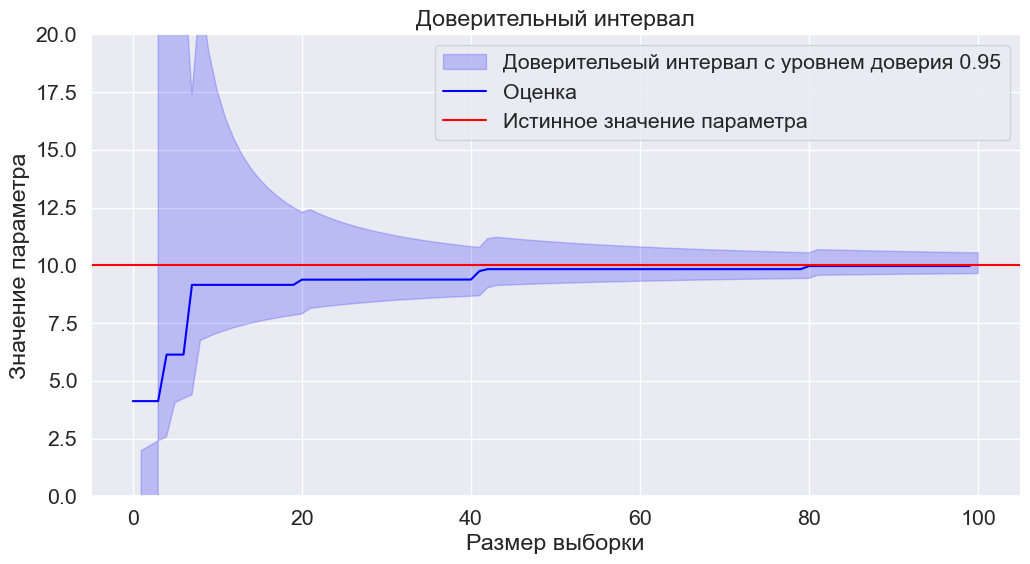

In [ ]:
size = 100
sample = sps.uniform.rvs(size=size, scale = 10)
true_theta = 10
alpha = 0.95
X_n = np.maximum.accumulate(sample)
low = (X_n*np.arange(2,size + 2))/(np.arange(1, size + 1) + np.sqrt(np.arange(1, size + 1)/(np.arange(2, size + 2) * (1-alpha))))
high = (X_n*np.arange(2,size + 2))/(np.arange(1, size + 1) - np.sqrt(np.arange(1, size + 1)/(np.arange(2, size + 2) * (1-alpha))))
draw_confidence_interval(sample, low, high, X_n, true_theta)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

В данном случае получить доверительный интервал через неравенство Чебышева будет намного сложнее, так как дисперсию и в целом функцию распределения медианы посчитать сложно. Поэтому найдем асимптотический доверительный интервал. Для этого воспользуемся методом квантилей и из него получим: <br>
$\sqrt{n}(X_{n,\frac{1}{2}} - \theta) \xrightarrow{d} N(0, \frac{\pi^2}{4})$ <br>
$\frac{2\sqrt{n}(X_{n,\frac{1}{2}} - \theta)}{\pi} \xrightarrow{d} N(0,1)$ <br>
Пусть $u_{\frac{1-\alpha}{2}}$ и $u_{\frac{1+\alpha}{2}}$ - квантили нормального стандартного распределения. Тогда получаем: <br>
$\lim_{n\to\infty}P(u_{\frac{1-\alpha}{2}} < \frac{2\sqrt{n}(X_{n,\frac{1}{2}} - \theta)}{\pi} < u_{\frac{1+\alpha}{2}}) = \alpha$ <br>
Отсюда выражая $\theta$ получаем, что $(X_{n,\frac{1}{2}} - \frac{u_{\frac{1+\alpha}{2}}\pi}{2\sqrt{n}}, X_{n,\frac{1}{2}} - \frac{u_{\frac{1-\alpha}{2}}\pi}{2\sqrt{n}})$ - асимптотический доверительный интервал.

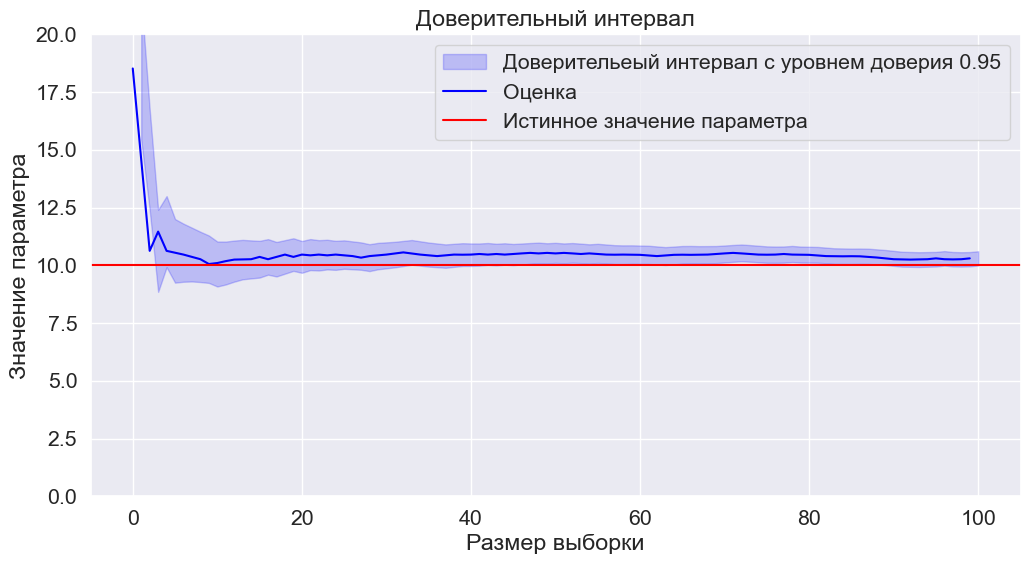

In [ ]:
sample = sps.cauchy.rvs(loc = true_theta, size = size)
cummedian = count_cummedian(sample)
low_quntile = sps.norm.ppf((1-alpha)/2)
high_quntile = sps.norm.ppf((1+alpha)/2)
low = cummedian - (high_quntile * np.pi)/(2 * np.sqrt(np.arange(1, size + 1)))
high = cummedian - (low_quntile * np.pi)/(2 * np.sqrt(np.arange(1, size + 1)))
draw_confidence_interval(sample, low, high, cummedian, true_theta)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Аналогично предыдущему пункту посчитаем асимптотический доверительный интервал. Для этого сначала запишем ЦПТ: <br>
$\frac{\sqrt{n}(\overline{X} - \theta)}{\sqrt{\theta}} \xrightarrow{d} N(0, 1)$ <br>
Тогда из ЦПТ следует: <br>
$\lim_{n\to\infty}P(u_{\frac{1-\alpha}{2}} < \frac{\sqrt{n}(\overline{X} - \theta)}{\sqrt{\theta}}  < u_{\frac{1+\alpha}{2}}) = \alpha$ <br>
По лемме Слуцкого можем заменить в знаменателе $\theta$ на $\overline{X}$:
$\lim_{n\to\infty}P(u_{\frac{1-\alpha}{2}} < \frac{\sqrt{n}(\overline{X} - \theta)}{\sqrt{\overline{X}}}  < u_{\frac{1+\alpha}{2}}) = \alpha$
Тогда получаем, что асимптотический доверительный интервал: $(\overline{X} - u_{\frac{1+\alpha}{2}}\sqrt{\frac{\overline{X}}{n}}, \overline{X} - u_{\frac{1-\alpha}{2}}\sqrt{\frac{\overline{X}}{n}})$


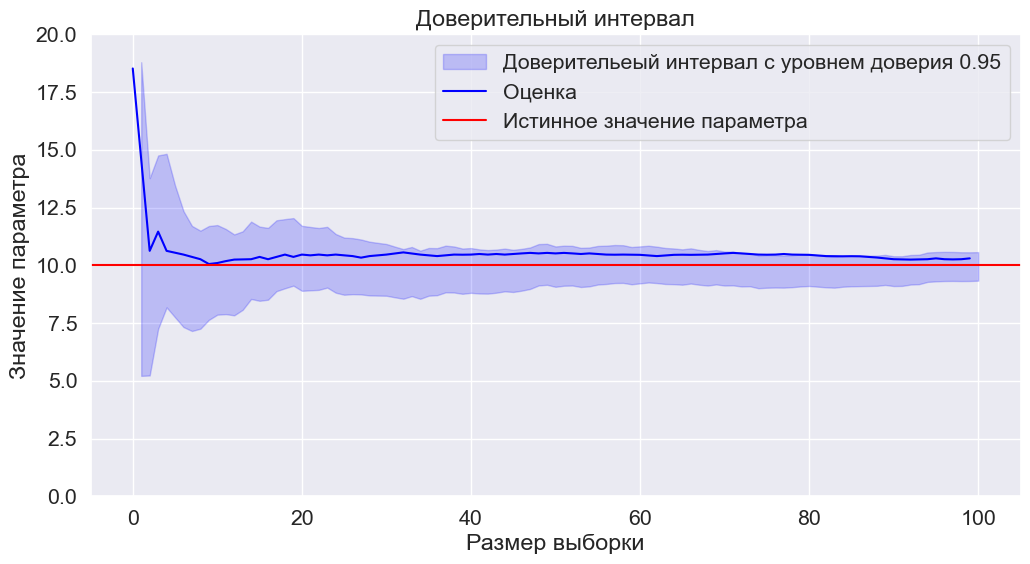

In [ ]:
sample = sps.poisson.rvs(mu = true_theta, size = size)
cummean = (np.cumsum(sample)/np.arange(1,size+1))
low = cummean - high_quntile * np.sqrt(cummean/np.arange(1,size+1))
high = cummean - low_quntile * np.sqrt(cummean/np.arange(1,size+1))
draw_confidence_interval(sample, low, high, cummedian, true_theta)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Запишем ЦПТ: <br>
$\frac{\sqrt{n}(\overline{X} - \lambda\theta)}{\sqrt{\lambda\theta^2}} \xrightarrow{d} N(0, 1)$ <br>
Из ЦПТ получаем:
$\lim_{n\to\infty}P(u_{\frac{1-\alpha}{2}} < \frac{\sqrt{n}(\overline{X} - \lambda\theta)}{\sqrt{\lambda\theta^2}}  < u_{\frac{1+\alpha}{2}}) = \alpha$ <br>
Из леммы Слуцкого:
$\lim_{n\to\infty}P(u_{\frac{1-\alpha}{2}} < \frac{\lambda \sqrt{\lambda}}{\overline{X}} \sqrt{n}(\frac{\overline{X}}{\lambda} - \theta) < u_{\frac{1+\alpha}{2}}) = \alpha$ <br>
Выражая $\theta$ получаем доверительный интервал: $(\frac{\overline{X}}{\lambda}- u_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{n}\lambda \sqrt{\lambda}}, \frac{\overline{X}}{\lambda}- u_{\frac{1-\alpha}{2}} \frac{\overline{X}}{\sqrt{n}\lambda \sqrt{\lambda}})$

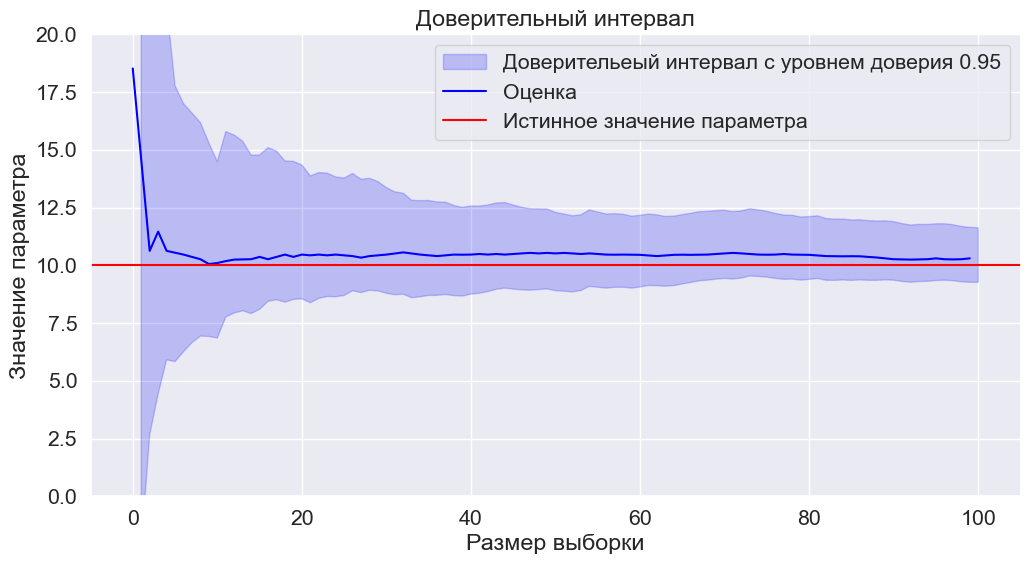

In [ ]:
lambd = 3
sample = sps.gamma.rvs(a = 10, scale = 3, size = size)
cummean = (np.cumsum(sample)/np.arange(1,size+1))
low = cummean/lambd- high_quntile * (cummean)/(np.sqrt(np.arange(1,size+1)) * lambd * np.sqrt(lambd))
high = cummean/lambd- low_quntile * (cummean)/(np.sqrt(np.arange(1,size+1)) * lambd * np.sqrt(lambd))
draw_confidence_interval(sample, low, high, cummedian, true_theta)

Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод: так как все полученные нами доверительные интервалы, кроме первого являются асимптотическими, то они возможно могут иметь уровень доверия меньше $\alpha$ при малых n. Ширина доверительного интервала напрямую зависит от уровня доверия - чем выше уровень доверия тем шире интервал. В случае с гамма распределением ширина получилась намного больше, чем у Коши и равномерного.

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Если $S^2$ - выборочная несмещенная дисперсия, то $T = \frac{\overline{X} - a}{S/ \sqrt{n}}$ - распределение Стьюдента с n-1 степенями свободы. Тогда если $u_{\frac{1-\alpha}{2}}$ и $u_{\frac{1+\alpha}{2}}$ - квантили распределения стьюдента с n-1 степенями свободы тогда имеем: <br>
$P(u_{\frac{1-\alpha}{2}} < \frac{\overline{X} - a}{S/ \sqrt{n}} < u_{\frac{1+\alpha}{2}}) = \alpha$ <br>
Выражая отсюда a получаем точный доверительный интервал: $(\overline{X} - u_{\frac{1+\alpha}{2}}  \frac{S}{\sqrt{n}}, \overline{X} - u_{\frac{1-\alpha}{2}}  \frac{S}{\sqrt{n}})$. <br>
Из ЦПТ имеем асимптотический доверительный интервал: $(\overline{X} - z_{\frac{1+\alpha}{2}}\frac{S}{\sqrt{n}}, \overline{X} - z_{\frac{1-\alpha}{2}}\frac{S}{\sqrt{n}})$, где z- соответствующие квантили нормального стандартного распределения <br>
Для бутстрепного же доверительного интервала: $(\overline{X} - z_{\frac{1+\alpha}{2}}\sqrt{\frac{S}{n}}, \overline{X} - z_{\frac{1-\alpha}{2}}\sqrt{\frac{S}{n}})$, где S - бутстрепная оценка дисперсии

Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

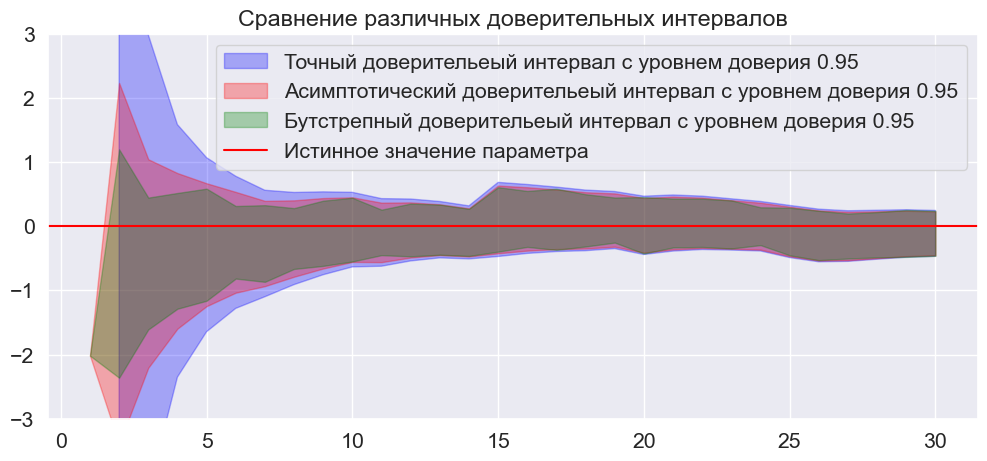

In [ ]:
n = 30
a = 0
sample = sps.norm.rvs(loc = 0, scale = 1, size = n)
cummean = (np.cumsum(sample)/np.arange(1, n+1))
S = np.array([np.sum((sample[:i] - np.mean(sample[:i]))**2) for i in np.arange(1, n+1)])
range = np.arange(0, n)
range[0] = 1
S = np.sqrt(S/range)
student_low_quantiles = np.array([sps.t.ppf((1-alpha)/2, i-1) for i in np.arange(1, n+1)])
student_high_quantiles = np.array([sps.t.ppf((1+alpha)/2, i-1) for i in np.arange(1, n+1)])

exact_low = cummean - student_high_quantiles * S/(np.sqrt(np.arange(1, n+1))) 
exact_high = cummean - student_low_quantiles * S/(np.sqrt(np.arange(1, n+1))) 

assympt_low = cummean - high_quntile * S/np.sqrt(np.arange(1, n+1))
assympt_high = cummean - low_quntile * S/np.sqrt(np.arange(1, n+1))

k = 10
bootstrap_vars = []
for i in np.arange(1, n+1):
    bootstrap_samples = np.random.choice(sample[:i], size=(k, i), replace=True)
    bootstrap_var = np.var(bootstrap_samples, axis=1)
    bootstrap_vars.append(np.mean(bootstrap_var))
bootstrap_low = cummean - high_quntile * np.sqrt(bootstrap_vars/np.arange(1, n+1))
bootstrap_high = cummean - low_quntile * np.sqrt(bootstrap_vars/np.arange(1, n+1))


plt.figure(figsize=(12, 5))
plt.fill_between(np.arange(1, n + 1), exact_low, exact_high, color = 'blue', alpha = 0.3, label=f'Точный доверительеый интервал с уровнем доверия 0.95')
plt.fill_between(np.arange(1, n + 1), assympt_low, assympt_high, color = 'red', alpha = 0.3, label=f'Асимптотический доверительеый интервал с уровнем доверия 0.95')
plt.fill_between(np.arange(1, n + 1), bootstrap_low, bootstrap_high, color = 'green', alpha = 0.3, label=f'Бутстрепный доверительеый интервал с уровнем доверия 0.95')
plt.axhline(a, color = 'red', label='Истинное значение параметра')
plt.legend()
plt.ylim(-3, 3)
plt.title("Сравнение различных доверительных интервалов")
plt.show()

По графикам видно, что точный доверительный интервал шире асимптотического, а асимптотический шире бутстрепного, однако все они сходятся к одному и тому же интервалу с ростом n.

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

In [ ]:
N = 1000
n=30
samples = sps.norm.rvs(size =(N, n), loc = 0, scale = 1)
mean = np.mean(samples, axis = 1)
S = np.sqrt(np.var(samples, axis = 1))
S *= np.sqrt(n/(n-1))
exact_percent = 0
a=0
student_high_quantile = student_high_quantiles[n-1]
student_low_quantile = student_low_quantiles[n-1]
for i in np.arange(N):
    exact_percent += int(mean[i] - student_high_quantile * S[i]/(np.sqrt(n)) < a < mean[i] - student_low_quantile * S[i]/(np.sqrt(n)))
assympt_percent = 0
for i in np.arange(N):
    assympt_percent += int(mean[i] - high_quntile * S[i]/np.sqrt(n) < a < mean[i] - low_quntile * S[i]/np.sqrt(n))

bootstrap_vars = []
for i in np.arange(N):
    bootstrap_sample = np.random.choice(samples[i], size=(k, n), replace=True)
    bootstrap_var = np.var(bootstrap_sample, axis=0)
    bootstrap_vars.append(np.mean(bootstrap_var))

bootstrap_percent = 0

for i in np.arange(N):
    bootstrap_percent += int(mean[i] - high_quntile * np.sqrt(bootstrap_vars[i]/n) < a < mean[i] - low_quntile * np.sqrt(bootstrap_vars[i]/n))

print("Доля попадания в точный доверительный интервал:{}".format(exact_percent/N))
print("Доля попадания в асимптотический интервал:{}".format(assympt_percent/N))
print("Доля попадания в бутстрепный интервал:{}".format(bootstrap_percent/N))

Доля попадания в точный доверительный интервал:0.961
Доля попадания в асимптотический интервал:0.951
Доля попадания в бутстрепный интервал:0.93


Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод: лучше всего как и ожидалось показал себя точный доверительный интервал, после него асимптотический, а потом бутстрепный. Хоть у бутстрепного и асимптотического доля попадания немного меньше, они уже, чем точный доверительный интервал. В случае маленького размера выборки очевидно, что лучше подойдет всего подойдет точный доверительный интервал, но по графику выше видно, что он сходится к асимптотическому доверительному интервалу с ростом n, так что при достаточно больших n можно использовать также и асимптотический доверительный интервал.

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-

C:\Users\pinma\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-
To: c:\Users\pinma\Downloads\Telegram Desktop\1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-

0.00B [00:00, ?B/s]
92.3kB [00:00, 5.41MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включительно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?